# Iterating through all patients in all years to find peep>5

In [102]:
import pandas as pd
from datetime import datetime
import os
import pickle
from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np
import os

import json

import sys
from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
import matplotlib.ticker as plticker

import seaborn as sns
from matplotlib.cm import ScalarMappable


import sys
sys.path.append('../') # add this line so Data and data are visible in this file
sys.path.append('../../') # add this line so Data and data are visible in this file
sys.path.append('../PhysioMC/') # add this line so Data and data are visible in this file

# from PatchWand import *
from filters import *
from setting import *
# from preprocessing import *
from ECG_module import *
from dataIO import *
from stage1_PPG_analysis import *

from importlib import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# selected_id = 10

In [3]:
%pwd

'/labs/kamaleswaranlab/Sepsis3_062321/mchan_analysis/disparities_O2/repo/stage3_interrater_analysis'

In [4]:
outputdir = '../../data/stage3/'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)

In [5]:
inputdir = '/labs/kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

In [6]:
demographic_filedir = '../../data/Pat_BedTime_List_some_on_BMI_2_6_22_dem.csv'

df_demographic = pd.read_csv(demographic_filedir, index_col=0)  


In [7]:
df_demographic.shape

(6285, 9)

In [8]:
df_demographic_processed = pd.read_csv(outputdir+'df_demographic_processed.csv.gz')  


In [9]:
df_demographic_processed.shape

(179, 19)

In [10]:
df_demographic_processed

id_vars = ['deBedTime', 'DateStart', 'DateEnd', 'PAT_ID', 'BED_LOCATION_START', 'BED_LOCATION_END', 'White', 'Black', 'Race String']

df2 = pd.melt(df_demographic_processed, id_vars=id_vars, 
                  var_name="feature_name", value_name="feature")

In [11]:
# df_demographic_processed['White', 'Black']

In [65]:
X = df_demographic_processed[['B2C', 'max2min', 'PI', 'std', 'skewness', 'kurtosis', 'rms', 'energy', 'mean', 'White', 'Black', 'Race String']].copy()


In [66]:
X

,B2C,max2min,PI,std,skewness,kurtosis,rms,energy,mean,White,Black,Race String
0,3.705019,3.902952,1.030261,1.170934,0.336743,-0.938273,1.187073,329.060853,3.783615,True,False,Caucasian or White
1,3.497053,3.354127,0.887997,0.990033,0.239301,-0.956555,1.010432,235.239758,3.811167,True,False,Caucasian or White
2,3.683347,4.333929,1.125200,1.273415,0.351938,-0.892114,1.280928,389.180788,3.833917,True,False,Caucasian or White
3,2.963683,4.007279,0.981521,1.178020,-0.044834,-1.068208,1.185622,333.055698,4.115000,True,False,Caucasian or White
4,2.337624,3.488548,0.918549,0.985555,0.391615,-0.777702,1.003428,233.116580,3.823313,False,True,African American or Black
...,...,...,...,...,...,...,...,...,...,...,...,...
174,2.653142,2.517258,0.643492,0.703985,0.494207,-0.538536,0.709077,118.942800,3.905333,False,True,African American or Black
175,2.119064,4.260612,1.113931,1.129950,0.633000,-0.139812,1.146914,306.428751,3.813771,False,True,African American or Black
176,3.120565,3.708079,0.897880,1.191670,0.120090,-1.324609,1.194316,340.818722,4.063552,True,False,Caucasian or White
177,1.402662,2.853640,0.735144,0.773922,0.891757,-0.177011,0.786621,143.749092,3.865875,True,False,Caucasian or White


In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
pca_features = PCA(n_components=3)


In [86]:
var_pca = np.cumsum(np.round(pca_features.explained_variance_ratio_, decimals=3)*100)
print('PCA var:', var_pca)
explained_var = var_pca[1]

PCA var: [60.3 80.8 91.6]


In [71]:
features = X.iloc[:, :-3].values

In [74]:
col_name = list(X.iloc[:, :-3].columns)
col_name

['B2C',
 'max2min',
 'PI',
 'std',
 'skewness',
 'kurtosis',
 'rms',
 'energy',
 'mean']

In [75]:
features

array([[  3.7050185 ,   3.90295206,   1.03026099, ...,   1.18707329,
        329.0608531 ,   3.78361458],
       [  3.49705265,   3.3541272 ,   0.88799749, ...,   1.01043159,
        235.23975788,   3.81116667],
       [  3.68334725,   4.33392893,   1.12520038, ...,   1.28092792,
        389.18078756,   3.83391667],
       ...,
       [  3.12056468,   3.70807889,   0.89787978, ...,   1.19431552,
        340.81872217,   4.06355208],
       [  1.40266243,   2.85364012,   0.73514409, ...,   0.78662058,
        143.74909214,   3.865875  ],
       [  2.55202099,   2.62699605,   0.64108107, ...,   0.81208387,
        156.6028437 ,   4.09651042]])

In [76]:
features = StandardScaler().fit_transform(features) # normalizing the features
print('show standardize mean and std:', np.mean(features),np.std(features))



show standardize mean and std: -2.2604168347427148e-17 1.0


In [77]:
principalComponents_features = pca_features.fit_transform(features)


In [78]:
X.loc[:,'PC1'] = principalComponents_features[:, 0]
X.loc[:,'PC2'] = principalComponents_features[:, 1]

In [84]:
X.loc[:,'MAE_SpO2'] = np.random.rand(X.shape[0])

In [93]:
# X.loc[:, 'Race'] = ''

In [94]:
# X.loc[:, 'Race'] = ''

In [91]:
# X['Race String'].unique()

array(['Caucasian or White', 'African American  or Black'], dtype=object)

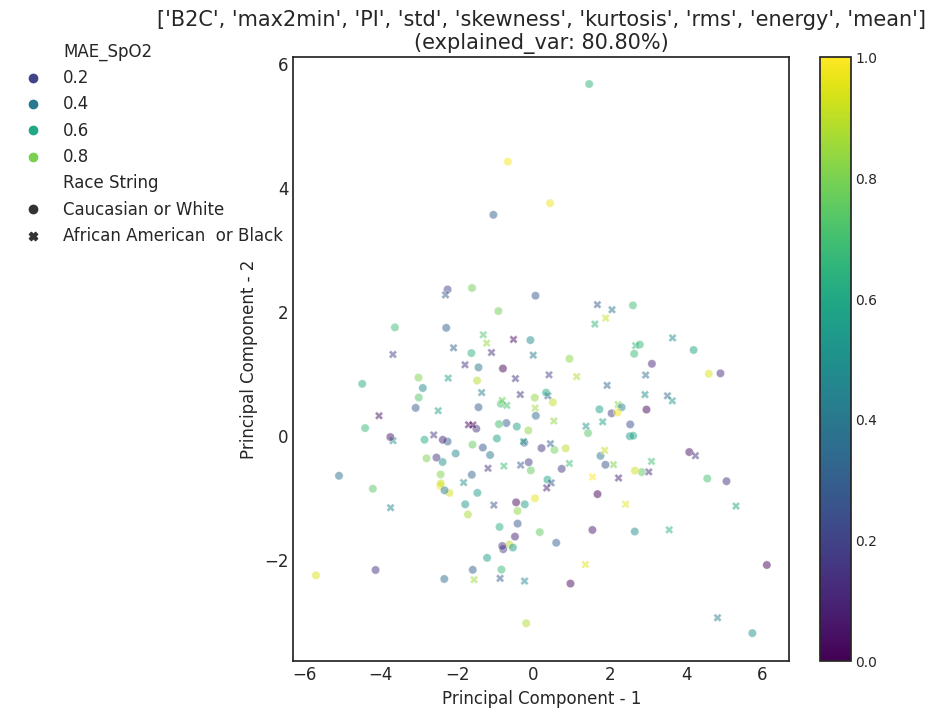

In [145]:
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=100)

ax.set_xlabel('Principal Component - 1',fontsize=12)
ax.set_ylabel('Principal Component - 2',fontsize=12)
ax.set_title('{}\n(explained_var: {:.2f}%)'.format(col_name, explained_var),fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)

legend_dict = {
    0: 'White',
    1: 'Black',
}

race_color_dict = {
    'Caucasian or White': 'firebrick',
    'African American  or Black': 'steelblue',
}

# pt_label = ['']

marker = 'o'
# colors = 'r'
alpha = 0.5

mask_White = X['White']==True
mask_Black = X['Black']==True

markers = {"Caucasian or White": "o", "African American  or Black": "X"}
# sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)



sns.scatterplot(data=X, x="PC1", y="PC2", hue='MAE_SpO2', style="Race String", ax=ax, palette='viridis', hue_norm=(0,1), markers=markers,alpha=alpha)
# ax.add_legend()

# ax.legend_.remove()
# ax.legend([],[], frameon=False)

#Colormap for comparison
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(0,1)
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)


# ax.legend(loc='upper right', prop={'size': 15})
# ax.legend(handles=h, labels=['child', 'teen'])
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles=handles[-3:], labels=labels[-3:])
ax.legend(bbox_to_anchor= (.01, 1.05), prop={'size': 12})


In [141]:
# handles, labels[-3:]

In [ ]:
sys.exit()

In [ ]:
beats = beats_dict['SPO2']

plt.plot(beats, color='gray', alpha=0.1)
plt.plot(beats.mean(axis=1), color='red', alpha=0.7)
# plt.ylim(-1,1)
plt.show()

beats = beats_dict['SPO2'][:, mask_all]

plt.plot(beats, color='gray', alpha=0.1)
plt.plot(beats.mean(axis=1), color='red', alpha=0.7)
# plt.ylim(-1,1)
plt.show()

In [ ]:
feature_names = list(df_features_sub.keys())
feature_names.remove('i_R_peak')


# feature_names

In [ ]:
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")

fig, axes = plt.subplots(len(feature_names),1, figsize=(5,20), dpi=80)

for ax, feature_name in zip(axes, feature_names):
# sns.violinplot(x=df_features["B2C"], ax=axes[0], orient='v')
# sns.violinplot(x=df_features["PI"], ax=axes[1], orient='v')

    sns.violinplot(data=df_features_sub, y=feature_name, ax=ax)
# sns.violinplot(data=df_features_sub, y="PI", ax=axes[1])


In [ ]:
df_features_sub.keys()

In [ ]:
plt.plot(df_features_sub['rms'].values)

In [ ]:
np.median(df_features_sub['max2min'].values)

In [ ]:

# np.prod(mask_feature_list, axis=1)

In [ ]:
mask_feature_list.shape

In [ ]:
aaa = np.asarray([[ True,  True,  True, True],
       [ True,  False,  True, True],
       [ True,  True,  True, True]])

aaa

In [ ]:
np.prod(aaa, axis=1)

In [ ]:
mask_feature_list.shape

In [ ]:
# np.stack(mask_feature_list).T
# aaa = np.asarray([[1.,2.],[3.,4.]])
# np.prod(aaa, axis=0), aaa

In [ ]:
FQI_dict

In [ ]:
FQI_dict = get_FQI_dict(df_features['B2C'].values)
plt.plot(FQI_dict['FQI'])

In [ ]:
plt.plot(ECG)
plt.xlim(0,1000)

In [ ]:
t_ecg = np.arange(ECG.shape[0])/Fs
hr_interp = np.interp(t_ecg, QRS_detector_dict['ts_hr'], QRS_detector_dict['hr'])

# plt.plot(t_ecg, hr_interp)
plt.plot(QRS_detector_dict['ts_hr'], QRS_detector_dict['hr'])
plt.xlim(0, 100)

In [ ]:
# plt.plot(t_ecg, ECG)
# plt.xlim(0, 500)

In [ ]:
# plt.plot(t_ecg, ECG)
# plt.xlim(300, 350)

In [ ]:
# plt.plot(t_ecg[::10], hr_interp[::10])
# plt.xlim(0, 1000)

In [ ]:
# def get_filt_df(df_sync, Fs):
#     df = df_sync.copy()

#     for sig_name in df.columns:
#         if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
#             df[sig_name] = get_padded_filt(df[sig_name].values, filter_padded=1, lowcutoff=FILT_ECG[0], highcutoff=FILT_ECG[1], Fs=Fs)
#         elif 'RR' == sig_name:
#             df[sig_name] = get_padded_filt_DSwrapper(df[sig_name].values, filter_padded=1, lowcutoff=FILT_RESP[0], highcutoff=FILT_RESP[1], Fs=Fs)
#         elif 'SPO2' == sig_name:
#             df[sig_name] = get_padded_filt(df[sig_name].values, filter_padded=1, lowcutoff=FILT_PPG[0], highcutoff=FILT_PPG[1], Fs=Fs)
#         else:
#             pass

#     return df


In [ ]:

# beats_dict = segment_df(df_seg, QRS_detector_dict, Fs)
# use_ensemble = True


In [ ]:
# if use_ensemble:
#     for key in beats_dict:
#         if 'ppg' not in key:
#             continue
#         sig_beats = beats_dict[key]
#         beats_dict[key] = get_ensemble_beats(sig_beats, N_enBeats=4, use_woody=False)

In [ ]:
beats_dict.keys()

In [ ]:
beats_id = [1,2,3,4,5,6]
beats_names = ['I', 'II', 'III', 'V', 'SPO2', 'PPG_DC']
unit_dict['PPG_DC'] = ''

def plot_ALL_beats(beats_dict, beats_id, subject_id, Fs, show_good=None, fig_name=None, outputdir=None, show_plot=False):

    t_beat = np.arange(beats_dict['I'].shape[0])/Fs

    fig = plt.figure(figsize=(16, 10), dpi=80)
    fontsize = 20
    alpha = 0.03


    # for (beat_name, beat_i) in zip(beats_dict, beats_id):
    for (beat_name, beat_i) in zip(beats_names, beats_id):

        beats = beats_dict[beat_name]

        ax = fig.add_subplot(3, 4, beat_i)
        ax.set_title(beat_name+'\n', fontsize=fontsize)

        show_good = True
        if show_good is not None:


            template = beats_dict[beat_name].mean(axis=1)
            if beat_name=='SPO2':
                mask_all, ol_rate = clean_PPG(beats, template, Fs)
                ax.set_title(beat_name+'\nacception_rate:{:.2f}'.format(1-ol_rate), fontsize=fontsize)

            # if 'ppg' in beat_name:

    #             # if beat_name[-1]=='1':
    #                 template = beats_dict['ppg_r_1'].mean(axis=1)
    #             elif beat_name[-1]=='2':
    #                 template = beats_dict['ppg_r_1'].mean(axis=1)

    #             mask_all, ol_rate = clean_PPG(beats, template, Fs)
    #             if show_good==False:
    #                 beats = beats[:, ~mask_all]
    # #                     print(beat_name, ol_rate)
    #                 ax.set_title(beat_name+'\nrejection_rate:{:.2f}'.format(ol_rate), fontsize=fontsize)
    #             else:
    #                 beats = beats[:, mask_all]
    # #                     print(beat_name, ol_rate)
    #                 ax.set_title(beat_name+'\nacception_rate:{:.2f}'.format(1-ol_rate), fontsize=fontsize)



        ax.plot(t_beat, beats, color='gray', alpha=alpha)
        ax.plot(t_beat, np.mean(beats,axis=1), color='firebrick', linewidth=3)

        if 'SPO2' in beat_name or 'I' == beat_name or 'II' == beat_name or 'III' == beat_name or 'V' == beat_name:
            beats_mean = np.mean(beats,axis=1)

            ymin = beats_mean.mean() - beats_mean.std()*5
            ymax = beats_mean.mean() + beats_mean.std()*5
            ax.set_ylim(ymin, ymax)

        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.set_ylabel(unit_dict[beat_name], fontsize=fontsize-3)
        ax.set_xlabel('time (sec)', fontsize=fontsize)



    fig.tight_layout()

    # if outputdir is not None:

    #     if fig_name is None:
    #         fig_name = 'beats_ensemble_sub{}'.format(subject_id)

    #     if not os.path.exists(outputdir):
    #         os.makedirs(outputdir)
    #     fig.savefig(outputdir + fig_name+'.png', transparent=False)

    # if show_plot == False:
    #     plt.close(fig)
    #     pyplot.close(fig)
    #     plt.close('all')


    # #     if log_wandb:
    # #         wandb.log({fig_name: wandb.Image(fig)})



In [ ]:
df_features

In [ ]:
plt.plot(df_features['PI'].values)

In [ ]:
debug_B2C(beats_PPG, Fs)


In [ ]:
data = df_features['B2C'].values
FQI_dict = get_FQI_dict(data)
plt.plot(FQI_dict['FQI'])

In [ ]:
df_features

In [ ]:
data = df_features['PI'].values
FQI_dict = get_FQI_dict(data)
plt.plot(FQI_dict['FQI'])

In [ ]:
data = df_features['max2min'].values
FQI_dict = get_FQI_dict(data)
plt.plot(FQI_dict['FQI'])

In [ ]:
feature_names!='i_R_peak'

In [ ]:
feature_names

In [ ]:
feature_names = df_features.columns
feature_names = feature_names[feature_names!='i_R_peak']
N_feature = feature_names.shape[0]

In [ ]:
df_seg

In [ ]:
fig, (axes) = plt.subplots(N_feature+2, 1, figsize=(20,8), dpi=100)

t_sig = df_seg['time'].values
t_sig = t_sig-t_sig[0]

ax1= axes[0]
ax1.plot(t_sig, df_seg['SPO2'].values)
ax1.set_ylabel('PPG')

ax2= axes[1]
ax2.plot(t_sig, df_seg['RR'].values)
ax2.set_ylabel('RR')

for i, feature_name in enumerate(feature_names):
    ax = axes[i+2]
    # ax2.scatter(beats_dict['i_R_peaks'][mask_feature], features_B2C[mask_feature])
    data = df_features[feature_name].values
    FQI_dict = get_FQI_dict(data)
    mask_feature = FQI_dict['mask_feature']
    ax.plot(df_features['i_R_peak'][mask_feature&mask_all]/Fs, df_features[feature_name][mask_feature&mask_all])
    ax.scatter(df_features['i_R_peak'][mask_feature&mask_all]/Fs, df_features[feature_name][mask_feature&mask_all])
    ax.set_ylabel(feature_name)

ax.set_xlabel('time (s)')
fig.tight_layout()


In [ ]:
beats_dict['i_R_peaks'].shape, features_B2C.shape

In [ ]:
sig_plt

In [ ]:
t_start = 1100
t_end = 1150

df_seg = df[(df['time']>=t_start) & (df['time']<=t_end)].copy()

t_arr = df_seg['time'].values
#     t_arr = t_arr - t_arr[0]

t_start = t_arr[0]
t_end = t_arr[-1]

sig_name = 'SPO2'
sig_plt = df_seg[sig_name].values


sig_plt = get_padded_filt(sig_plt, filter_padded=5, lowcutoff=1, highcutoff=4, Fs=Fs)

# t_arr = df_seg['time'].values
alpha=0.5
fig, ax = plt.subplots(1, 1, figsize=(25,10), gridspec_kw = {'wspace':0, 'hspace':0}, dpi=80)
ax.plot(t_arr, sig_plt, alpha=alpha ,zorder=1, linewidth=linewidth)
# ax.set_ylim(-5,5)

In [ ]:
unit_dict

In [ ]:
homedir = os.path.expanduser('~')+'/'

In [ ]:
inputdir = homedir+'kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

In [ ]:
for sub_file in os.listdir(inputdir):
    # print(sub_file)
    pass

In [ ]:
sub_id = 'A071-0512777549'

In [ ]:
for sub_file in os.listdir(inputdir+sub_id):
    if 'hea' in sub_file:
        print(sub_file)